In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Processing and graphing EvM tower

In [94]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/US-EvM_filtered_with_lat_long_date.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the data type of the TIMESTAMP_START column
print(df['TIMESTAMP_START'].dtype)

print(df.head())

float64
   TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long
0     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826
1     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826
2     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826
3     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826
4     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826


In [95]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/US-EvM_filtered_with_lat_long_date.csv"
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/EvM_corrected_temperature_data.csv"

# Step 1: Read CSV file
df = pd.read_csv(file_path)

# Step 2: Convert TIMESTAMP_START column from float to string, then pad with zeros
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str).str.zfill(12)

# Step 3: Function to convert 'YYYYMMDDHHMM' format to datetime
def convert_to_datetime(timestamp_str):
    try:
        return pd.to_datetime(timestamp_str, format='%Y%m%d%H%M')
    except ValueError:
        return pd.NaT  # Return NaT if conversion fails

# Apply the conversion function
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].apply(convert_to_datetime)

# Step 4: Create Year-Month column
df['YearMonth'] = df['TIMESTAMP_START'].dt.strftime('%Y-%m')

# Step 5: Export the DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/EvM_corrected_temperature_data.csv


In [96]:
# Read CSV file
df = pd.read_csv(file_path)

# Display the data type of the TIMESTAMP_START column
timestamp_type = df['TIMESTAMP_START'].dtype
print(f"Data type of TIMESTAMP_START column: {timestamp_type}")

# Convert int64 to string (if necessary)
# Assuming the column is already in the format YYYYMMDDHHMM
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str)

# Example function to extract components
def extract_components(timestamp_str):
    # Example: Extract year and month
    year = timestamp_str[:4]
    month = timestamp_str[4:6]
    return f"Year: {year}, Month: {month}"

# Apply function to TIMESTAMP_START column
df['Components'] = df['TIMESTAMP_START'].apply(extract_components)

# Display first few rows to verify
print(df.head())

# Save modified DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

Data type of TIMESTAMP_START column: float64
  TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0  202001000000.0   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
1  202001000000.0   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
2  202001000000.0   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
3  202001000000.0   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
4  202001000000.0   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   

              Components  
0  Year: 2020, Month: 01  
1  Year: 2020, Month: 01  
2  Year: 2020, Month: 01  
3  Year: 2020, Month: 01  
4  Year: 2020, Month: 01  
New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/EvM_corrected_temperature_data.csv


In [97]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/EvM_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

# Save modified DataFrame to a new CSV file
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/EvM_extracted_year_month.csv"
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

   TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
1     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
2     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
3     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
4     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   

              Components  
0  Year: 2020, Month: 01  
1  Year: 2020, Month: 01  
2  Year: 2020, Month: 01  
3  Year: 2020, Month: 01  
4  Year: 2020, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
1     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
2     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
3     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.5519 -80.7826   
4     2.020010e+11   2.020010e+11 -9999.0 -9999.0  25.55

In [98]:
print(df['Year'].dtype)
print(df['Month'].dtype)

int32
int32


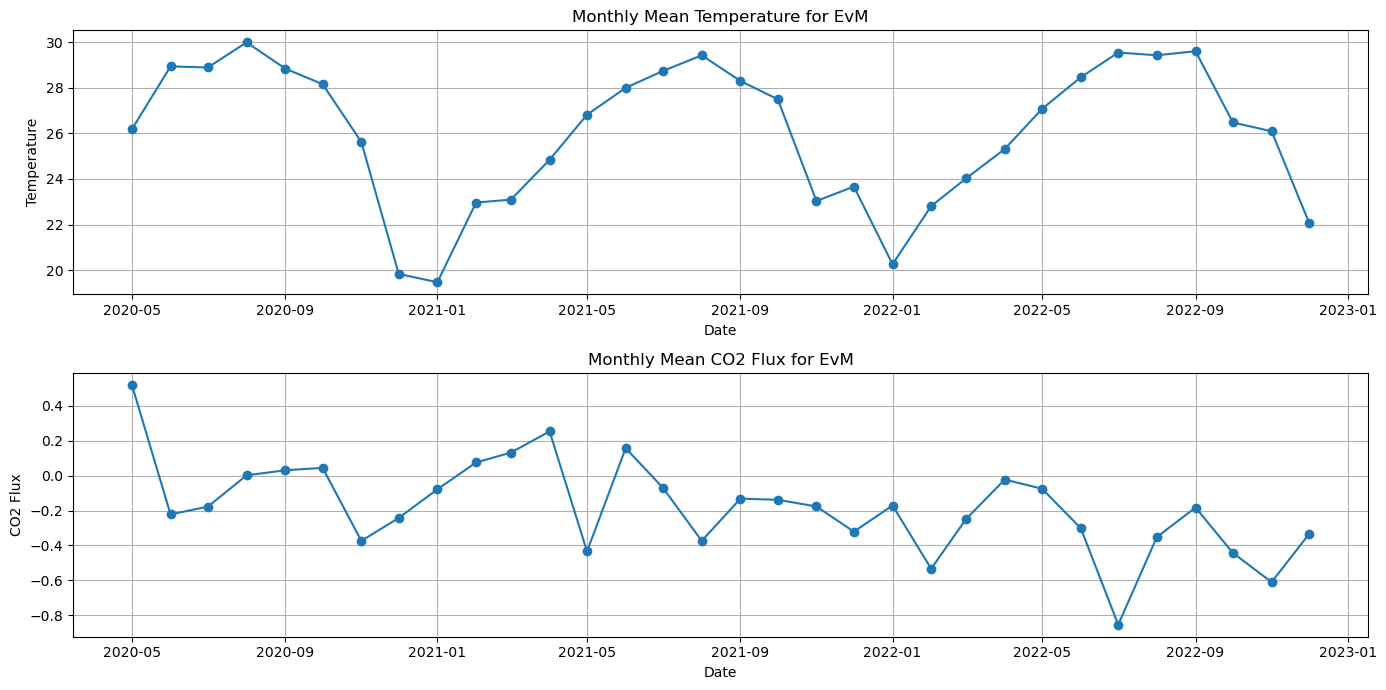

In [99]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Assuming 'FC' is another column in your dataframe
df['FC'] = df['FC'].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Prepare data for analysis
# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Calculate monthly mean temperatures and FC
monthly_means = df.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means['Date'] = pd.to_datetime(monthly_means[['Year', 'Month']].assign(day=1))

# Create separate plots for each variable
plt.figure(figsize=(14, 7))

# Plot for temperature columns
plt.subplot(2, 1, 1)
for col in temperature_columns:
    plt.plot(monthly_means['Date'], monthly_means[col], label=col, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Mean Temperature for EvM')
plt.grid(True)

# Plot for FC
plt.subplot(2, 1, 2)
plt.plot(monthly_means['Date'], monthly_means['FC'], label='FC', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CO2 Flux')
plt.title('Monthly Mean CO2 Flux for EvM')
plt.grid(True)

plt.tight_layout()
plt.show()


# Processing and graphing Elm tower

In [100]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/US-Elm_merged_filtered_with_lat_long_date.csv"
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Elm_corrected_temperature_data.csv"

# Step 1: Read CSV file
df = pd.read_csv(file_path)

# Step 2: Convert TIMESTAMP_START column from float to string, then pad with zeros
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str).str.zfill(12)

# Step 3: Function to convert 'YYYYMMDDHHMM' format to datetime
def convert_to_datetime(timestamp_str):
    try:
        return pd.to_datetime(timestamp_str, format='%Y%m%d%H%M')
    except ValueError:
        return pd.NaT  # Return NaT if conversion fails

# Apply the conversion function
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].apply(convert_to_datetime)

# Step 4: Create Year-Month column
df['YearMonth'] = df['TIMESTAMP_START'].dt.strftime('%Y-%m')

# Step 5: Export the DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Elm_corrected_temperature_data.csv


In [101]:
# Read CSV file
df = pd.read_csv(file_path)

# Display the data type of the TIMESTAMP_START column
timestamp_type = df['TIMESTAMP_START'].dtype
print(f"Data type of TIMESTAMP_START column: {timestamp_type}")

# Convert int64 to string (if necessary)
# Assuming the column is already in the format YYYYMMDDHHMM
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str)

# Example function to extract components
def extract_components(timestamp_str):
    # Example: Extract year and month
    year = timestamp_str[:4]
    month = timestamp_str[4:6]
    return f"Year: {year}, Month: {month}"

# Apply function to TIMESTAMP_START column
df['Components'] = df['TIMESTAMP_START'].apply(extract_components)

# Display first few rows to verify
print(df.head())

# Save modified DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

Data type of TIMESTAMP_START column: int64
  TIMESTAMP_START  TIMESTAMP_END      FC   TA_F      Lat     Long  \
0    201601010000   201601010030 -9999.0  23.70  25.5519 -80.7826   
1    201601010030   201601010100 -9999.0  23.64  25.5519 -80.7826   
2    201601010100   201601010130 -9999.0  23.52  25.5519 -80.7826   
3    201601010130   201601010200 -9999.0  23.44  25.5519 -80.7826   
4    201601010200   201601010230 -9999.0  23.38  25.5519 -80.7826   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Elm_corrected_temperature_data.csv


In [102]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Elm_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

# Save modified DataFrame to a new CSV file
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Elm_extracted_year_month.csv"
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

   TIMESTAMP_START  TIMESTAMP_END      FC   TA_F      Lat     Long  \
0     201601010000   201601010030 -9999.0  23.70  25.5519 -80.7826   
1     201601010030   201601010100 -9999.0  23.64  25.5519 -80.7826   
2     201601010100   201601010130 -9999.0  23.52  25.5519 -80.7826   
3     201601010130   201601010200 -9999.0  23.44  25.5519 -80.7826   
4     201601010200   201601010230 -9999.0  23.38  25.5519 -80.7826   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC   TA_F      Lat     Long  \
0     201601010000   201601010030 -9999.0  23.70  25.5519 -80.7826   
1     201601010030   201601010100 -9999.0  23.64  25.5519 -80.7826   
2     201601010100   201601010130 -9999.0  23.52  25.5519 -80.7826   
3     201601010130   201601010200 -9999.0  23.44  25.5519 -80.7826   
4     201601010200   201601010230 -9999.0  23.38  25.5519 -80.7826 

In [103]:
print(df['Year'].dtype)
print(df['Month'].dtype)

int32
int32


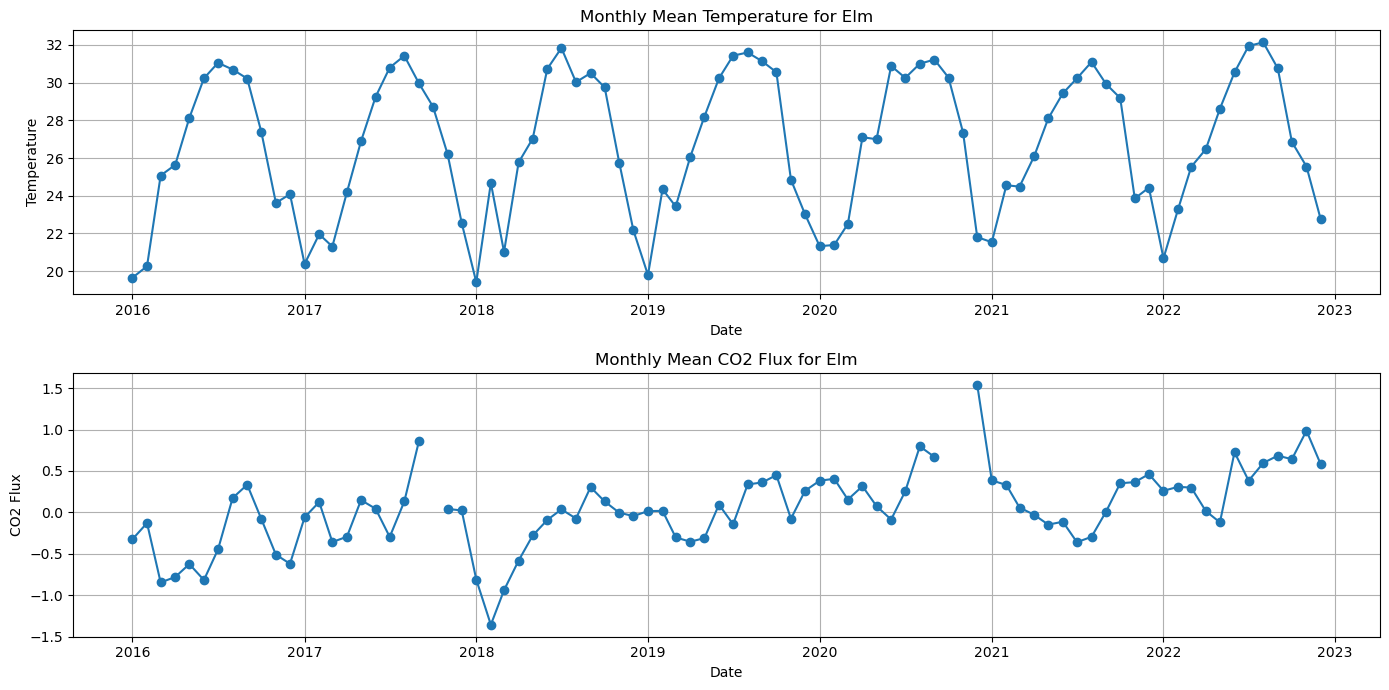

In [104]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA_F']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Assuming 'FC' is another column in your dataframe
df['FC'] = df['FC'].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Prepare data for analysis
# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Calculate monthly mean temperatures and FC
monthly_means = df.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means['Date'] = pd.to_datetime(monthly_means[['Year', 'Month']].assign(day=1))

# Create separate plots for each variable
plt.figure(figsize=(14, 7))

# Plot for temperature columns
plt.subplot(2, 1, 1)
for col in temperature_columns:
    plt.plot(monthly_means['Date'], monthly_means[col], label=col, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Mean Temperature for Elm')
plt.grid(True)

# Plot for FC
plt.subplot(2, 1, 2)
plt.plot(monthly_means['Date'], monthly_means['FC'], label='FC', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CO2 Flux')
plt.title('Monthly Mean CO2 Flux for Elm')
plt.grid(True)

plt.tight_layout()
plt.show()


# Processing and graphing Esm tower

In [105]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/US-Esm_merged_filtered_with_lat_long_date.csv"
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Esm_corrected_temperature_data.csv"

# Step 1: Read CSV file
df = pd.read_csv(file_path)

# Step 2: Convert TIMESTAMP_START column from float to string, then pad with zeros
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str).str.zfill(12)

# Step 3: Function to convert 'YYYYMMDDHHMM' format to datetime
def convert_to_datetime(timestamp_str):
    try:
        return pd.to_datetime(timestamp_str, format='%Y%m%d%H%M')
    except ValueError:
        return pd.NaT  # Return NaT if conversion fails

# Apply the conversion function
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].apply(convert_to_datetime)

# Step 4: Create Year-Month column
df['YearMonth'] = df['TIMESTAMP_START'].dt.strftime('%Y-%m')

# Step 5: Export the DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Esm_corrected_temperature_data.csv


In [106]:
# Read CSV file
df = pd.read_csv(file_path)

# Display the data type of the TIMESTAMP_START column
timestamp_type = df['TIMESTAMP_START'].dtype
print(f"Data type of TIMESTAMP_START column: {timestamp_type}")

# Convert int64 to string (if necessary)
# Assuming the column is already in the format YYYYMMDDHHMM
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str)

# Example function to extract components
def extract_components(timestamp_str):
    # Example: Extract year and month
    year = timestamp_str[:4]
    month = timestamp_str[4:6]
    return f"Year: {year}, Month: {month}"

# Apply function to TIMESTAMP_START column
df['Components'] = df['TIMESTAMP_START'].apply(extract_components)

# Display first few rows to verify
print(df.head())

# Save modified DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

Data type of TIMESTAMP_START column: int64
  TIMESTAMP_START  TIMESTAMP_END      FC    TA_F      Lat     Long  \
0    201601010000   201601010030 -9999.0 -9999.0  25.4379 -80.5946   
1    201601010030   201601010100 -9999.0 -9999.0  25.4379 -80.5946   
2    201601010100   201601010130 -9999.0 -9999.0  25.4379 -80.5946   
3    201601010130   201601010200 -9999.0 -9999.0  25.4379 -80.5946   
4    201601010200   201601010230 -9999.0 -9999.0  25.4379 -80.5946   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Esm_corrected_temperature_data.csv


In [107]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Esm_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

# Save modified DataFrame to a new CSV file
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/Esm_extracted_year_month.csv"
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

   TIMESTAMP_START  TIMESTAMP_END      FC    TA_F      Lat     Long  \
0     201601010000   201601010030 -9999.0 -9999.0  25.4379 -80.5946   
1     201601010030   201601010100 -9999.0 -9999.0  25.4379 -80.5946   
2     201601010100   201601010130 -9999.0 -9999.0  25.4379 -80.5946   
3     201601010130   201601010200 -9999.0 -9999.0  25.4379 -80.5946   
4     201601010200   201601010230 -9999.0 -9999.0  25.4379 -80.5946   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC    TA_F      Lat     Long  \
0     201601010000   201601010030 -9999.0 -9999.0  25.4379 -80.5946   
1     201601010030   201601010100 -9999.0 -9999.0  25.4379 -80.5946   
2     201601010100   201601010130 -9999.0 -9999.0  25.4379 -80.5946   
3     201601010130   201601010200 -9999.0 -9999.0  25.4379 -80.5946   
4     201601010200   201601010230 -9999.0 -9999.0  25.43

In [108]:
print(df['Year'].dtype)
print(df['Month'].dtype)

int32
int32


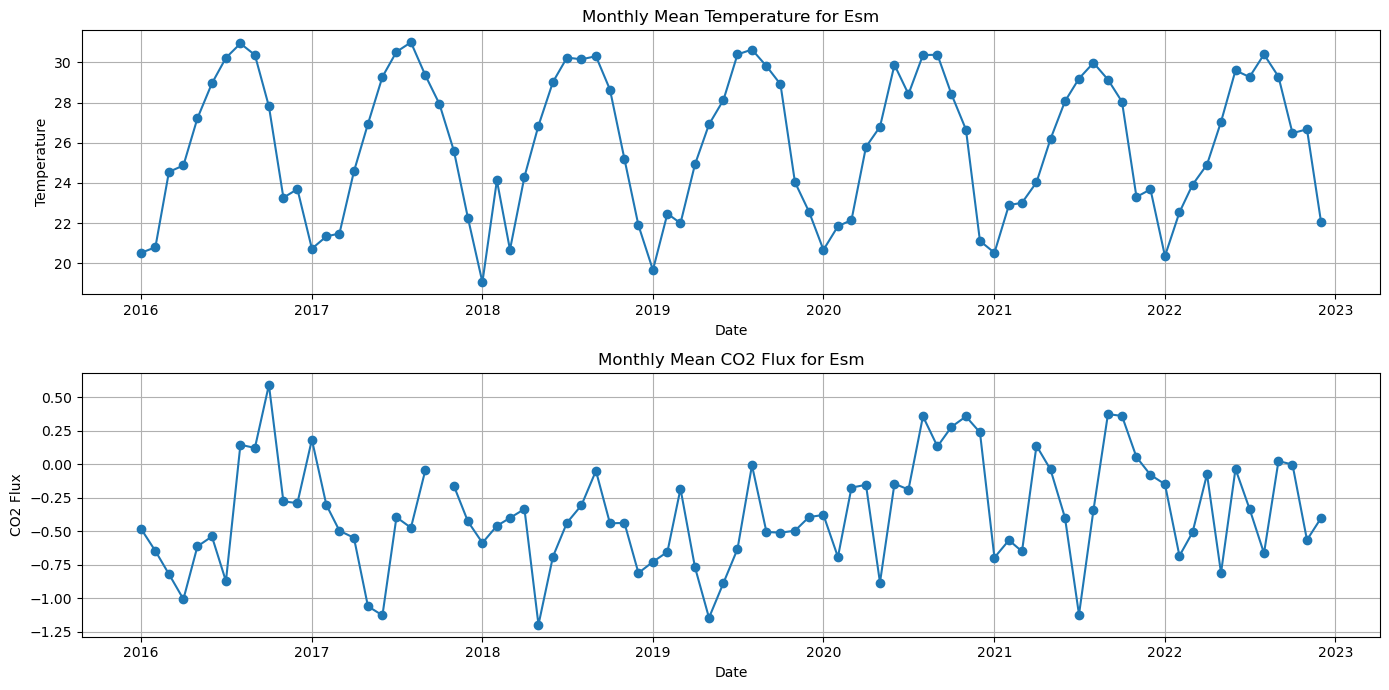

In [109]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA_F']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Assuming 'FC' is another column in your dataframe
df['FC'] = df['FC'].replace(-9999, np.nan)

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Prepare data for analysis
# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Calculate monthly mean temperatures and FC
monthly_means = df.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means['Date'] = pd.to_datetime(monthly_means[['Year', 'Month']].assign(day=1))

# Create separate plots for each variable
plt.figure(figsize=(14, 7))

# Plot for temperature columns
plt.subplot(2, 1, 1)
for col in temperature_columns:
    plt.plot(monthly_means['Date'], monthly_means[col], label=col, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Mean Temperature for Esm')
plt.grid(True)

# Plot for FC
plt.subplot(2, 1, 2)
plt.plot(monthly_means['Date'], monthly_means['FC'], label='FC', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CO2 Flux')
plt.title('Monthly Mean CO2 Flux for Esm')
plt.grid(True)

plt.tight_layout()
plt.show()

# Processing and graphing TaS tower

In [110]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/US-TaS_filtered_with_lat_long_date.csv"
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/TaS_corrected_temperature_data.csv"

# Step 1: Read CSV file
df = pd.read_csv(file_path)

# Step 2: Convert TIMESTAMP_START column from float to string, then pad with zeros
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str).str.zfill(12)

# Step 3: Function to convert 'YYYYMMDDHHMM' format to datetime
def convert_to_datetime(timestamp_str):
    try:
        return pd.to_datetime(timestamp_str, format='%Y%m%d%H%M')
    except ValueError:
        return pd.NaT  # Return NaT if conversion fails

# Apply the conversion function
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].apply(convert_to_datetime)

# Step 4: Create Year-Month column
df['YearMonth'] = df['TIMESTAMP_START'].dt.strftime('%Y-%m')

# Step 5: Export the DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/TaS_corrected_temperature_data.csv


In [111]:
# Read CSV file
df = pd.read_csv(file_path)

# Display the data type of the TIMESTAMP_START column
timestamp_type = df['TIMESTAMP_START'].dtype
print(f"Data type of TIMESTAMP_START column: {timestamp_type}")

# Convert int64 to string (if necessary)
# Assuming the column is already in the format YYYYMMDDHHMM
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str)

# Example function to extract components
def extract_components(timestamp_str):
    # Example: Extract year and month
    year = timestamp_str[:4]
    month = timestamp_str[4:6]
    return f"Year: {year}, Month: {month}"

# Apply function to TIMESTAMP_START column
df['Components'] = df['TIMESTAMP_START'].apply(extract_components)

# Display first few rows to verify
print(df.head())

# Save modified DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

Data type of TIMESTAMP_START column: float64
  TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0  201601000000.0   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
1  201601000000.0   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
2  201601000000.0   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
3  201601000000.0   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
4  201601000000.0   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/TaS_corrected_temperature_data.csv


In [112]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/TaS_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

# Save modified DataFrame to a new CSV file
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/TaS_extracted_year_month.csv"
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

   TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
1     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
2     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
3     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
4     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   

              Components  
0  Year: 2016, Month: 01  
1  Year: 2016, Month: 01  
2  Year: 2016, Month: 01  
3  Year: 2016, Month: 01  
4  Year: 2016, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC      TA      Lat     Long  \
0     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
1     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
2     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
3     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.1908 -80.6391   
4     2.016010e+11   2.016010e+11 -9999.0 -9999.0  25.19

In [113]:
print(df['Year'].dtype)
print(df['Month'].dtype)

int32
int32


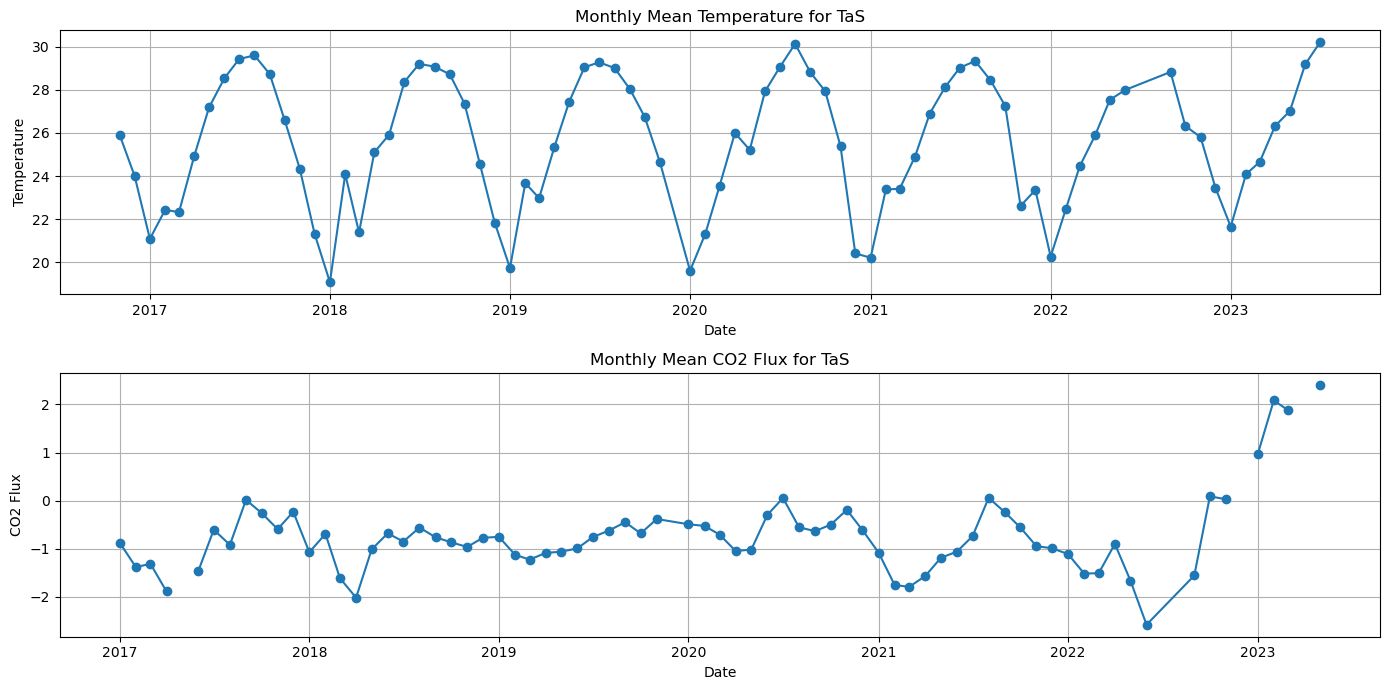

In [114]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Assuming 'FC' is another column in your dataframe
df['FC'] = df['FC'].replace(-9999, np.nan)

# Filter out negative values from temperature columns
for col in temperature_columns:
    df = df[df[col] >= 0]

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Prepare data for analysis
# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Calculate monthly mean temperatures and FC
monthly_means = df.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means['Date'] = pd.to_datetime(monthly_means[['Year', 'Month']].assign(day=1))

# Create separate plots for each variable
plt.figure(figsize=(14, 7))

# Plot for temperature columns
plt.subplot(2, 1, 1)
for col in temperature_columns:
    plt.plot(monthly_means['Date'], monthly_means[col], label=col, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Mean Temperature for TaS')
plt.grid(True)

# Plot for FC
plt.subplot(2, 1, 2)
plt.plot(monthly_means['Date'], monthly_means['FC'], label='FC', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CO2 Flux')
plt.title('Monthly Mean CO2 Flux for TaS')
plt.grid(True)

plt.tight_layout()
plt.show()

# Processing and graphing xDS tower

In [115]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/US-xDS_filtered_with_lat_long_date.csv"
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/xDS_corrected_temperature_data.csv"

# Step 1: Read CSV file
df = pd.read_csv(file_path)

# Step 2: Convert TIMESTAMP_START column from float to string, then pad with zeros
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str).str.zfill(12)

# Step 3: Function to convert 'YYYYMMDDHHMM' format to datetime
def convert_to_datetime(timestamp_str):
    try:
        return pd.to_datetime(timestamp_str, format='%Y%m%d%H%M')
    except ValueError:
        return pd.NaT  # Return NaT if conversion fails

# Apply the conversion function
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].apply(convert_to_datetime)

# Step 4: Create Year-Month column
df['YearMonth'] = df['TIMESTAMP_START'].dt.strftime('%Y-%m')

# Step 5: Export the DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/xDS_corrected_temperature_data.csv


In [116]:
# Read CSV file
df = pd.read_csv(file_path)

# Display the data type of the TIMESTAMP_START column
timestamp_type = df['TIMESTAMP_START'].dtype
print(f"Data type of TIMESTAMP_START column: {timestamp_type}")

# Convert int64 to string (if necessary)
# Assuming the column is already in the format YYYYMMDDHHMM
df['TIMESTAMP_START'] = df['TIMESTAMP_START'].astype(str)

# Example function to extract components
def extract_components(timestamp_str):
    # Example: Extract year and month
    year = timestamp_str[:4]
    month = timestamp_str[4:6]
    return f"Year: {year}, Month: {month}"

# Apply function to TIMESTAMP_START column
df['Components'] = df['TIMESTAMP_START'].apply(extract_components)

# Display first few rows to verify
print(df.head())

# Save modified DataFrame to a new CSV file
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

Data type of TIMESTAMP_START column: float64
  TIMESTAMP_START  TIMESTAMP_END      FC      TA     Lat     Long  \
0  201701000000.0   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
1  201701000000.0   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
2  201701000000.0   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
3  201701000000.0   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
4  201701000000.0   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   

              Components  
0  Year: 2017, Month: 01  
1  Year: 2017, Month: 01  
2  Year: 2017, Month: 01  
3  Year: 2017, Month: 01  
4  Year: 2017, Month: 01  
New CSV file saved: C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/xDS_corrected_temperature_data.csv


In [117]:
# File path
file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/xDS_corrected_temperature_data.csv"

# Read CSV file
df = pd.read_csv(file_path)

# Display the first few rows to inspect the 'Components' column
print(df.head())

# Split 'Components' column into 'Year' and 'Month' columns
df[['Year', 'Month']] = df['Components'].str.extract(r'Year: (\d+), Month: (\d+)')

# Convert 'Year' and 'Month' columns to integers
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(int)

# Display the updated DataFrame
print(df.head())

# Save modified DataFrame to a new CSV file
output_file_path = "C:/Users/mrale/OneDrive/Documents/Cleaned_Tower_Data/xDS_extracted_year_month.csv"
df.to_csv(output_file_path, index=False)

print(f"New CSV file saved: {output_file_path}")

   TIMESTAMP_START  TIMESTAMP_END      FC      TA     Lat     Long  \
0     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
1     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
2     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
3     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
4     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   

              Components  
0  Year: 2017, Month: 01  
1  Year: 2017, Month: 01  
2  Year: 2017, Month: 01  
3  Year: 2017, Month: 01  
4  Year: 2017, Month: 01  
   TIMESTAMP_START  TIMESTAMP_END      FC      TA     Lat     Long  \
0     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
1     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
2     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
3     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362   
4     2.017010e+11   2.017010e+11 -9999.0 -9999.0  28.125 -81.4362 

In [118]:
print(df['Year'].dtype)
print(df['Month'].dtype)

int32
int32


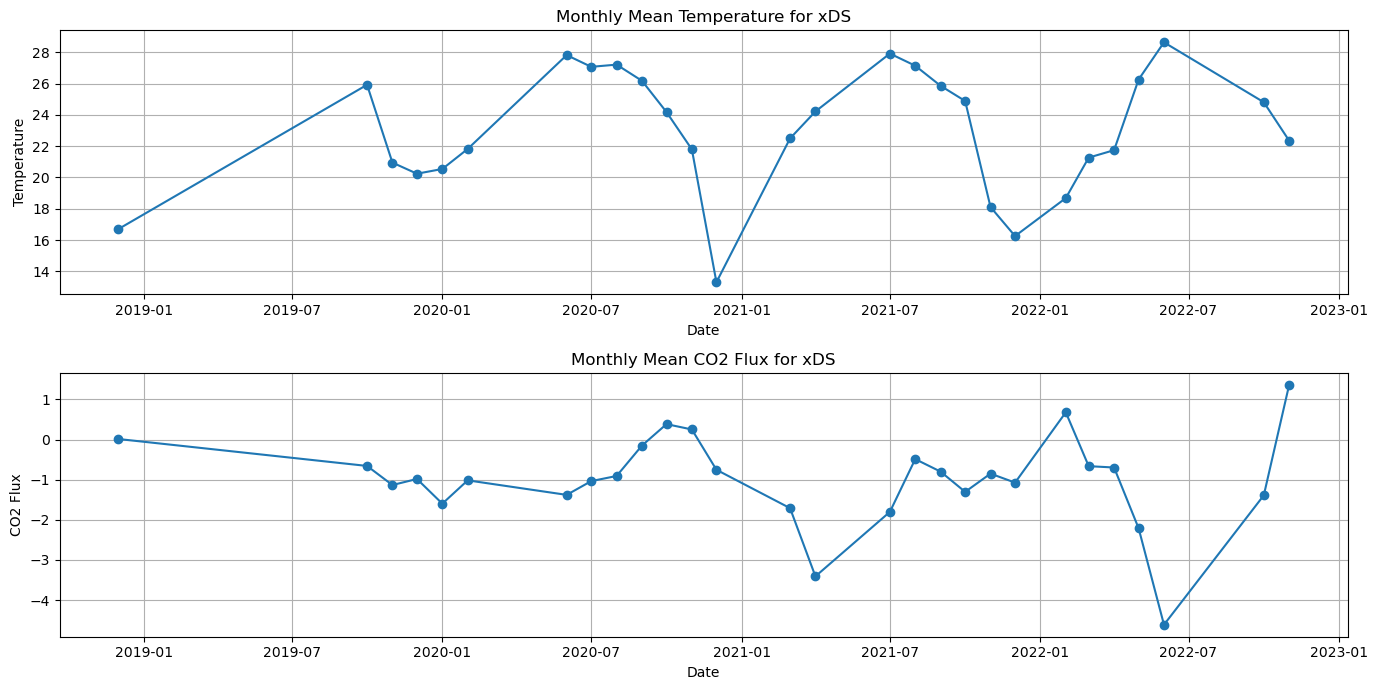

In [119]:
# Replace -9999 with NaN in temperature and FC columns
temperature_columns = ['TA']
df[temperature_columns] = df[temperature_columns].replace(-9999, np.nan)

# Assuming 'FC' is another column in your dataframe
df['FC'] = df['FC'].replace(-9999, np.nan)

# Filter 'FC' for outliers
df = df[(df['FC'] <= 10) & (df['FC'] >= -10)]

# Filter out negative values from temperature columns
for col in temperature_columns:
    df = df[df[col] >= 0]

# Convert 'Year' and 'Month' to datetime format
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))

# Prepare data for analysis
# Convert temperature columns and FC to numeric (if necessary)
df[temperature_columns + ['FC']] = df[temperature_columns + ['FC']].apply(pd.to_numeric, errors='coerce')

# Calculate monthly mean temperatures and FC
monthly_means = df.groupby(['Year', 'Month'])[temperature_columns + ['FC']].mean().reset_index()

# Convert 'Year' and 'Month' back to datetime for plotting
monthly_means['Date'] = pd.to_datetime(monthly_means[['Year', 'Month']].assign(day=1))

# Create separate plots for each variable
plt.figure(figsize=(14, 7))

# Plot for temperature columns
plt.subplot(2, 1, 1)
for col in temperature_columns:
    plt.plot(monthly_means['Date'], monthly_means[col], label=col, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Monthly Mean Temperature for xDS')
plt.grid(True)

# Plot for FC
plt.subplot(2, 1, 2)
plt.plot(monthly_means['Date'], monthly_means['FC'], label='FC', marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CO2 Flux')
plt.title('Monthly Mean CO2 Flux for xDS')
plt.grid(True)

plt.tight_layout()
plt.show()